# KNN Clasificador usando IRIS dataset

In [1]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
iris = load_iris(as_frame=True)
df = iris.frame
X = df[iris.feature_names] # Sepal length, Sepal width, Petal length, Petal width
y = df["target"]    # 0=setosa, 1=versicolor, 2=virginica
class_names = iris.target_names # Se usa class_names en classification_report

# stratify para mantener la proporción de clases, es decir, que si hay 50% de una clase y 50% de otra en el dataset original, 
# se mantenga esa proporción en los conjuntos de entrenamiento y prueba.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y) 

In [3]:
k = 4
model = KNeighborsClassifier(n_neighbors=k, n_jobs=-1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [4]:
accuracy = accuracy_score(y_test, y_pred)
# Usamos average="macro" para calcular la métrica para cada clase y luego promediar sin ponderar por el soporte (número de instancias en cada clase).
# zero_division=0 para evitar errores en caso de que alguna clase no tenga predicciones
precision = precision_score(y_test, y_pred, average="macro", zero_division=0)
recall = recall_score(y_test, y_pred, average="macro", zero_division=0)
f1 = f1_score(y_test, y_pred, average="macro", zero_division=0)


print(f"Accuracy : {accuracy:.3f}")
print(f"Precision (macro): {precision:.3f}")
print(f"Recall    (macro): {recall:.3f}")
print(f"F1        (macro): {f1:.3f}\n")
print(classification_report(y_test, y_pred, target_names=class_names, zero_division=0))


Accuracy : 1.000
Precision (macro): 1.000
Recall    (macro): 1.000
F1        (macro): 1.000

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00        10
   virginica       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



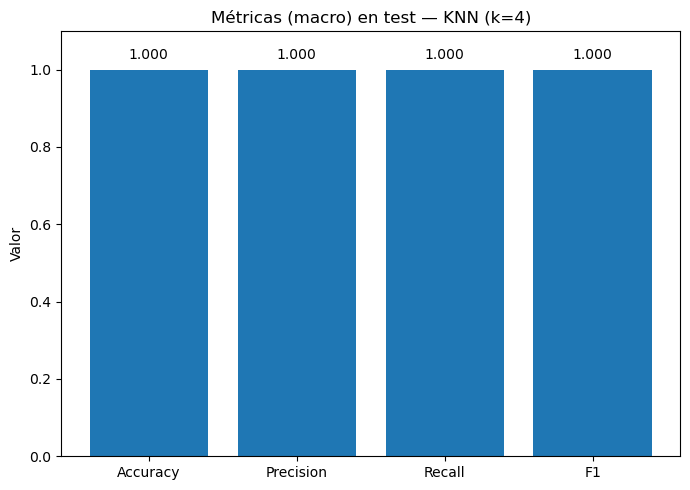

In [11]:
metric_names = ["Accuracy", "Precision", "Recall", "F1"]
metric_vals  = [accuracy, precision, recall, f1]

plt.figure(figsize=(7,5))
bars = plt.bar(metric_names, metric_vals)
plt.ylim(0, 1.1)
plt.title(f"Métricas — KNN (k={k})")
plt.ylabel("Valor")
for rect, val in zip(bars, metric_vals):
    h = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, h + 0.02, f"{val:.3f}",
             ha='center', va='bottom')
plt.tight_layout()
plt.show()

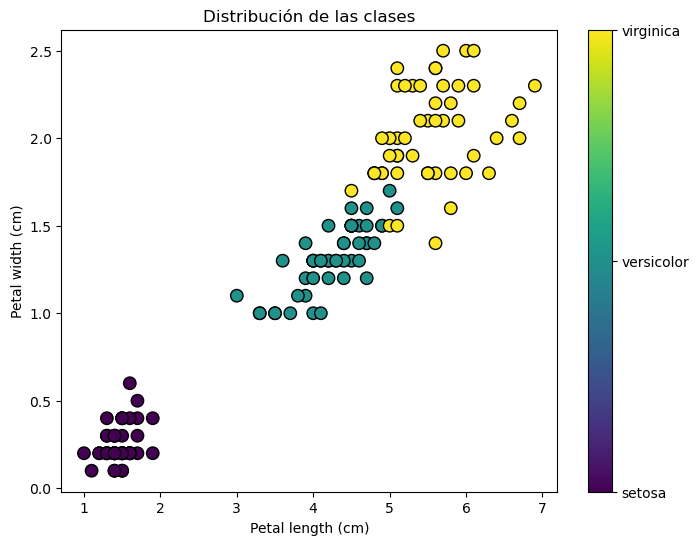

In [6]:
plt.figure(figsize=(8,6))
plt.scatter(
    df["petal length (cm)"],
    df["petal width (cm)"],
    # c para color de clase, cmap para mapa de colores, edgecolor para borde de puntos, s para tamaño de puntos
    c=df["target"], cmap="viridis", edgecolor="k", s=80
)
plt.xlabel("Petal length (cm)")
plt.ylabel("Petal width (cm)")
plt.title("Distribución de las clases")
cbar = plt.colorbar()
cbar.set_ticks([0,1,2])
cbar.set_ticklabels(class_names)
plt.show()

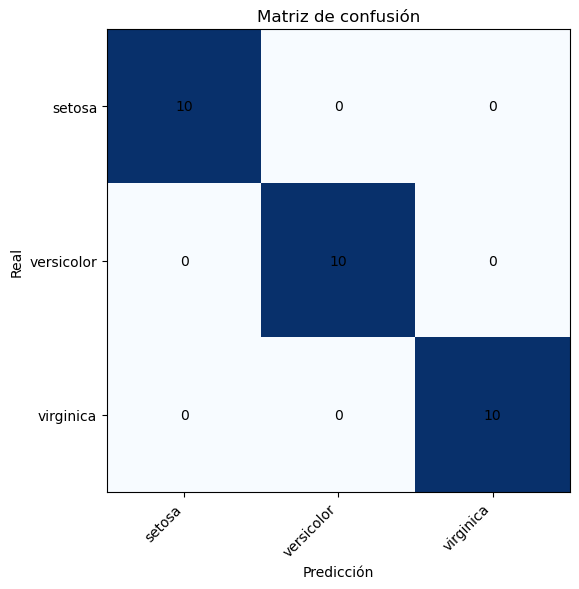

In [12]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(7,6))
# Usamos nearest para que no haya interpolación entre celdas, es decir, que cada celda tenga un color sólido
# cmap "Blues" para una escala de azules
plt.imshow(cm, interpolation='nearest', cmap='Blues') 
plt.title("Matriz de confusión")
plt.xticks(ticks=[0,1,2], labels=class_names, rotation=45, ha='right')
plt.yticks(ticks=[0,1,2], labels=class_names)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], ha="center", va="center")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.tight_layout()
plt.show()

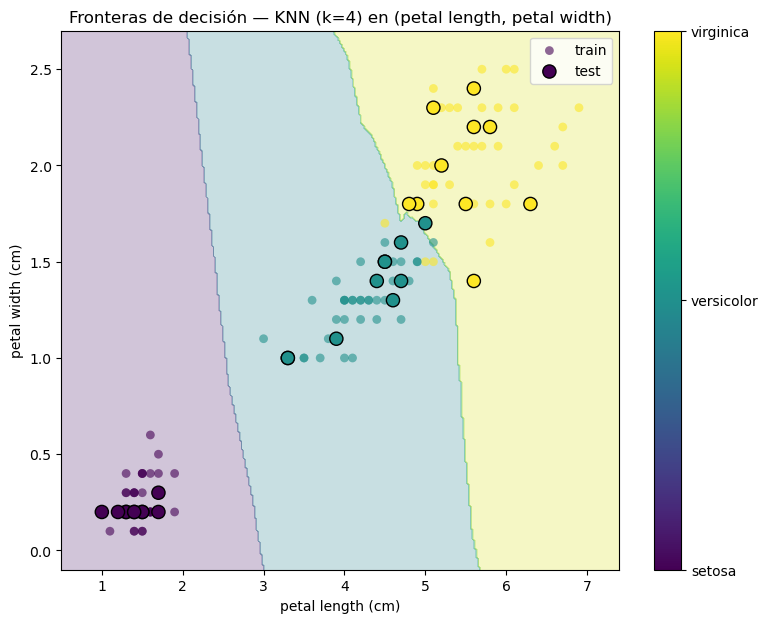

In [8]:
feat_x = "petal length (cm)"
feat_y = "petal width (cm)"
X2_train = X_train[[feat_x, feat_y]].to_numpy()
X2_test  = X_test[[feat_x, feat_y]].to_numpy()

model2d = KNeighborsClassifier(n_neighbors=k, n_jobs=-1)
model2d.fit(X2_train, y_train)

# malla para el plano 2D
x_min, x_max = X[[feat_x]].min().item()-0.5, X[[feat_x]].max().item()+0.5
y_min, y_max = X[[feat_y]].min().item()-0.2, X[[feat_y]].max().item()+0.2
xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 300),
    np.linspace(y_min, y_max, 300)
)
Z = model2d.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.figure(figsize=(9,7))
plt.contourf(xx, yy, Z, alpha=0.25)
plt.scatter(X2_train[:,0], X2_train[:,1], c=y_train, cmap="viridis",
            s=40, edgecolor="none", alpha=0.6, label="train")
plt.scatter(X2_test[:,0],  X2_test[:,1],  c=y_test,  cmap="viridis",
            s=90, edgecolor="k",   label="test")
plt.xlabel(feat_x)
plt.ylabel(feat_y)
plt.title(f"Fronteras de decisión — KNN (k={k}) en (petal length, petal width)")
cbar = plt.colorbar()
cbar.set_ticks([0,1,2])
cbar.set_ticklabels(class_names)
plt.legend()
plt.show()
